In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_5_descriptive = get_prompt("descriptive", 5)
prompt_5_natural = get_prompt("natural", 5)

prompt_5_descriptive, prompt_5_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time.',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD and radius of gyration of the simulation.')

In [3]:
llm_model = "gpt-4o-2024-08-06"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_5_descriptive)

Thought: To complete the tasks, I will follow these steps:

1. Download the PDB file 1LYZ.
2. Compute the secondary structure assignments for the downloaded PDB structure.
3. Set up and run a short simulation for 1ps at 300 K.
4. Compute the RMSD of the simulation.
5. Compute the radius of gyration over time.

Let's start with downloading the PDB file 1LYZ.

Action:
```json
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
To proceed with the next steps, I will compute the secondary structure assignments for the downloaded PDB structure using the DSSP tool.

Action:
```json
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_023005",
    "target_frames": "first"
  }
}
```To continue with the tasks, I will set up and run a short simulation for 1ps at 300 K using the downloaded PDB file. 

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_023005",
    "forcefield_files": ["ambe

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_023005: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_023005
 rec0_023007: dssp values for trajectory with id: 1LYZ_023005
 1LYZ_023021: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_023025: Initial positions for simulation sim0_023025
 sim0_023025: Basic Simulation of Protein 1LYZ_023021
 rec0_023025: Simulation trajectory for protein 1LYZ_023021 and simulation sim0_023025
 rec1_023025: Simulation state log for protein 1LYZ_023021 and simulation sim0_023025
 rec2_023025: Simulation pdb frames for protein 1LYZ_023021 and simulation sim0_023025
 rmsd_023025: RMSD for 023025
 fig0_023031: RMSD plot for 023025
 rgy_rec0_023025: Radii of gyration per frame for rec0_023025
 fig0_023033: Plot of radii of gyration over time for rec0_023025


In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_023005"))

In [7]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_023005", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [11]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_023025")
top_path_1 = registry_1.get_mapped_path("top_sim0_023025")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

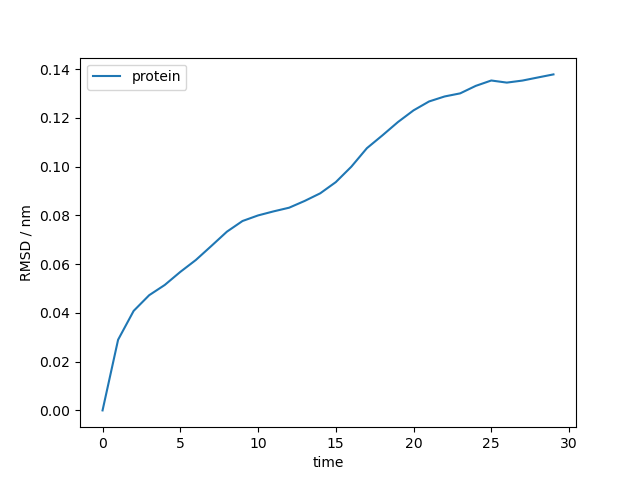

In [10]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_023031'))

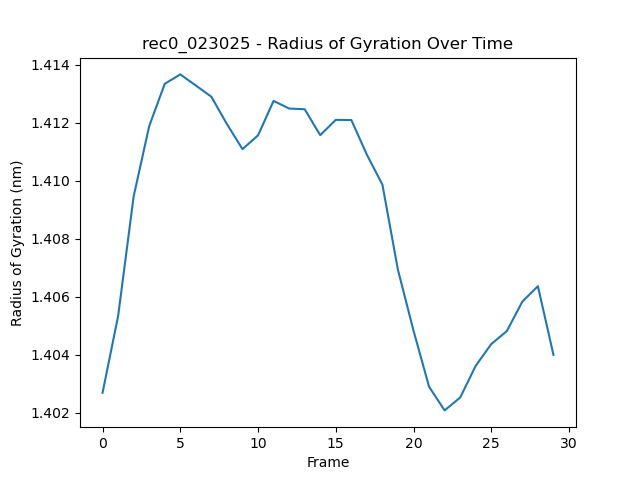

In [9]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_023033'))

In [12]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_5_natural)

Thought: To address the question, I need to perform the following steps:

1. Download the PDB file for 1LYZ.
2. Set up and run a molecular dynamics simulation for 1 picosecond at 300 K.
3. Report the secondary structure assignments of the downloaded PDB structure.
4. Compute the RMSD and radius of gyration of the simulation.

I will start by downloading the PDB file for 1LYZ.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1LYZ"
  }
}
```PDB file found with this ID: 1LYZ
To proceed with the task, I will set up and run a molecular dynamics simulation for 1 picosecond at 300 K using the downloaded PDB file for 1LYZ. After the simulation, I will compute the secondary structure assignments, RMSD, and radius of gyration.

Action:
```json
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_023140",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
   

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [14]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_023140: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_023140
 1LYZ_023147: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_023154: Initial positions for simulation sim0_023154
 sim0_023154: Basic Simulation of Protein 1LYZ_023147
 rec0_023154: Simulation trajectory for protein 1LYZ_023147 and simulation sim0_023154
 rec1_023154: Simulation state log for protein 1LYZ_023147 and simulation sim0_023154
 rec2_023154: Simulation pdb frames for protein 1LYZ_023147 and simulation sim0_023154
 rec0_023200: dssp values for trajectory with id: rec0_023154
 rmsd_023154: RMSD for 023154
 fig0_023203: RMSD plot for 023154
 rgy_rec0_023154: Radii of gyration per frame for rec0_023154
 fig0_023205: Plot of radii of gyration over time for rec0_023154


In [15]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_023140"))

In [16]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_023140", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [17]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_023154")
top_path_2 = registry_2.get_mapped_path("top_sim0_023154")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

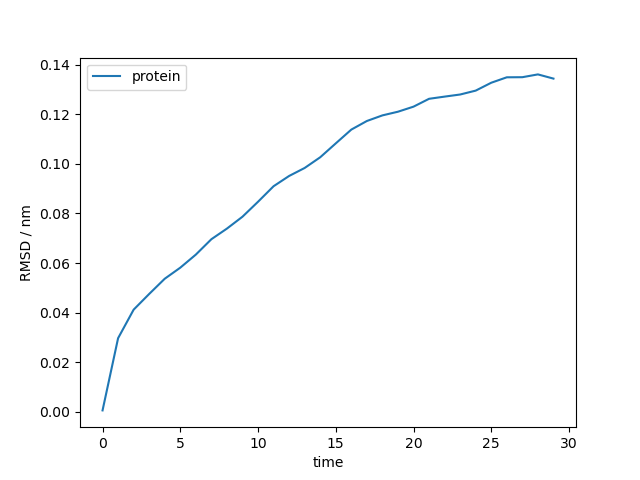

In [18]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_023203'))

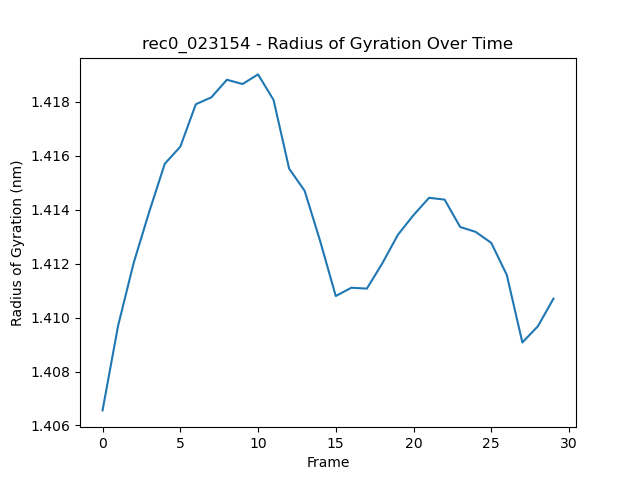

In [19]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_023205'))